In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import pandas as pd

import os
#sys.path.insert(0, os.getcwd()) 
import sys
sys.path.append('../')

from Utils import mnist_processor
from Utils import VAE, encoder_setup, decoder_setup
from Utils import run_knn_classifier, run_mlp_classifier, ssl_mlp, ssl_knn
from Utils import plot_orig_recon_imgs
from Utils import init_classifier_dataset, init_hists

In [2]:
# Main parameter
IMG_PER_CLASS=10

In [3]:
x_train, y_train, x_test, y_test=mnist_processor(keras.datasets.mnist)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# PARAMETERS
epochs=30
batch_size=128
ndim=28
latent_dim=128

In [5]:
npload=np.load("VAE_Resconstructed_MNIST.npz")
x_train_classifier=npload['x_train_classifier']
y_train_classifier=npload['y_train_classifier']

In [6]:
indices=np.load('digits_random_indices.npy')
mask = np.ones(len(x_train), dtype=bool)
mask[indices.flatten()] = False
x_train_unlabeled=x_train[mask].copy()
x_train_unlabeled=x_train_unlabeled[::-1]

In [7]:
npload=np.load("history_generative_VAE.npz")
hist_clf_train_f1=npload['hist_clf_train_f1'].tolist()
hist_clf_test_f1=npload['hist_clf_test_f1'].tolist()

In [30]:
hist_clf_train_classifier_f1=[]

In [31]:
K=5                                                                                                        
unlabeled_batch=500

while(True):
    
    if len(x_train_unlabeled) > 0:
        y_pseudo=ssl_knn(K, x_train_classifier, y_train_classifier, x_train_unlabeled[:unlabeled_batch])
        x_train_classifier=np.concatenate([x_train_classifier, x_train_unlabeled[:unlabeled_batch]], axis=0)
        y_train_classifier=np.concatenate([y_train_classifier, y_pseudo])
        x_train_unlabeled = x_train_unlabeled[unlabeled_batch:]
        print(f"{unlabeled_batch} pseudo-labeled images added to train dataset")
        print(f"{len(x_train_unlabeled)} images remained unlabeled")
    else:
        break
        
    clf_train_classifier_f1, clf_train_f1, clf_test_f1=run_knn_classifier(K, x_train_classifier, y_train_classifier,
                                                                            x_train, y_train.argmax(1),
                                                                            x_test, y_test.argmax(1),)
    
    train_size=x_train_classifier.shape[0]
    print("Train dataset size=", train_size)
    print(f"Classifier Train F1-score {(clf_train_classifier_f1):.3e}")
    print(f"Train F1-score= {(clf_train_f1):.3e}")
    print(f"Test F1-score= {(clf_test_f1):.3e}")
    print("-------------------------------------")
    hist_clf_train_classifier_f1.append(clf_train_classifier_f1)
    hist_clf_train_f1.append(clf_train_f1)
    hist_clf_test_f1.append(clf_test_f1)

500 pseudo-labeled images added to train dataset
59400 images remained unlabeled
Train dataset size= 5500
Classifier Train F1-score 9.660e-01
Train F1-score= 8.300e-01
Test F1-score= 8.324e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
58900 images remained unlabeled
Train dataset size= 6000
Classifier Train F1-score 9.645e-01
Train F1-score= 8.321e-01
Test F1-score= 8.351e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
58400 images remained unlabeled
Train dataset size= 6500
Classifier Train F1-score 9.645e-01
Train F1-score= 8.351e-01
Test F1-score= 8.396e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
57900 images remained unlabeled
Train dataset size= 7000
Classifier Train F1-score 9.656e-01
Train F1-score= 8.397e-01
Test F1-score= 8.440e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
57400 images remained unlab

Train dataset size= 23500
Classifier Train F1-score 9.722e-01
Train F1-score= 8.856e-01
Test F1-score= 8.960e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
40900 images remained unlabeled
Train dataset size= 24000
Classifier Train F1-score 9.720e-01
Train F1-score= 8.862e-01
Test F1-score= 8.956e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
40400 images remained unlabeled
Train dataset size= 24500
Classifier Train F1-score 9.716e-01
Train F1-score= 8.865e-01
Test F1-score= 8.957e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
39900 images remained unlabeled
Train dataset size= 25000
Classifier Train F1-score 9.718e-01
Train F1-score= 8.869e-01
Test F1-score= 8.955e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
39400 images remained unlabeled
Train dataset size= 25500
Classifier Train F1-score 9.719e-01
Train F1-s

500 pseudo-labeled images added to train dataset
23400 images remained unlabeled
Train dataset size= 41500
Classifier Train F1-score 9.733e-01
Train F1-score= 8.982e-01
Test F1-score= 9.086e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
22900 images remained unlabeled
Train dataset size= 42000
Classifier Train F1-score 9.731e-01
Train F1-score= 8.985e-01
Test F1-score= 9.083e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
22400 images remained unlabeled
Train dataset size= 42500
Classifier Train F1-score 9.731e-01
Train F1-score= 8.987e-01
Test F1-score= 9.087e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
21900 images remained unlabeled
Train dataset size= 43000
Classifier Train F1-score 9.731e-01
Train F1-score= 8.989e-01
Test F1-score= 9.088e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
21400 images remained u

500 pseudo-labeled images added to train dataset
5400 images remained unlabeled
Train dataset size= 59500
Classifier Train F1-score 9.735e-01
Train F1-score= 9.037e-01
Test F1-score= 9.128e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
4900 images remained unlabeled
Train dataset size= 60000
Classifier Train F1-score 9.736e-01
Train F1-score= 9.039e-01
Test F1-score= 9.128e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
4400 images remained unlabeled
Train dataset size= 60500
Classifier Train F1-score 9.736e-01
Train F1-score= 9.040e-01
Test F1-score= 9.131e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
3900 images remained unlabeled
Train dataset size= 61000
Classifier Train F1-score 9.736e-01
Train F1-score= 9.041e-01
Test F1-score= 9.138e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
3400 images remained unlabe

In [32]:
init_data=["Initial", hist_clf_train_f1[0], hist_clf_test_f1[0]]
last_data=["Last", hist_clf_train_f1[-1], hist_clf_test_f1[-1]]
df=pd.DataFrame([init_data, last_data], columns=["Data", "Train", "Test"])

In [33]:
df

,Data,Train,Test
0,Initial,0.687558,0.693508
1,Last,0.904854,0.914362


In [34]:
df.to_csv("self_training_KNN_with_VAE.csv", index=False)

In [35]:
hist_clf_test_f1[-1]

0.9143623660739179

In [54]:
np.savez("history_KNN_with_VAE.npz", hist_clf_train_f1=hist_clf_train_f1, hist_clf_test_f1=hist_clf_test_f1)

In [55]:
np.savez("self_training_KNN_after_VAE", x_train_classifier=x_train_classifier, y_train_classifier=y_train_classifier)

In [8]:
npload=np.load("history_KNN_with_VAE.npz")
hist_clf_train_f1=npload['hist_clf_train_f1'].tolist()
hist_clf_test_f1=npload['hist_clf_test_f1'].tolist()

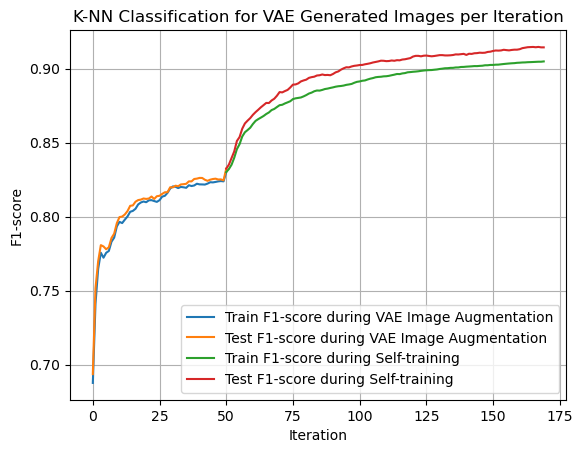

In [15]:
plt.plot(np.arange(0, 51),hist_clf_train_f1[:51], label="Train F1-score during VAE Image Augmentation")
plt.plot(np.arange(0, 51),hist_clf_test_f1[:51], label="Test F1-score during VAE Image Augmentation")

plt.plot(np.arange(50, 170), hist_clf_train_f1[50:], label="Train F1-score during Self-training")
plt.plot(np.arange(50, 170), hist_clf_test_f1[50:], label="Test F1-score during Self-training")

plt.xlabel("Iteration")
plt.ylabel("F1-score")
plt.title(f"K-NN Classification for VAE Generated Images per Iteration")
plt.legend()
plt.grid()
plt.show()